In [1]:
import ROOT as rt

Welcome to JupyROOT 6.24/02


In [4]:
input_file = rt.TFile("../online/output/MassOut.root")
input_list = input_file.Get("h-lambda")
c = rt.TCanvas("main")

In [5]:
single_dist = input_list.FindObject("fLambdaDist")
triggered_single_dist = input_list.FindObject("fTriggeredLambdaDist")

In [8]:
single_dist.GetAxis(0).SetRangeUser(2, 4)
triggered_single_dist.GetAxis(0).SetRangeUser(2, 4)

In [13]:
mass_dist = single_dist.Projection(3).Clone("mass_dist")
triggered_mass_dist = triggered_single_dist.Projection(3).Clone("triggered_mass_dist")

Warning in <TFile::Append>: Replacing existing TH1: fLambdaDist_proj_3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: fTriggeredLambdaDist_proj_3 (Potential memory leak).


In [15]:
mass_dist.Sumw2()
mass_dist.SetTitle("Single-particle #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
mass_dist.GetXaxis().SetTitle("Mass (GeV)")
mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
mass_dist.SetLineColor(rt.kBlue)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [19]:
triggered_mass_dist.Sumw2()
triggered_mass_dist.SetTitle("Triggered #Lambda^{0} candidate mass distribution (2 GeV < p_{T} < 4 GeV)") 
triggered_mass_dist.GetXaxis().SetTitle("Mass (GeV)")
triggered_mass_dist.GetYaxis().SetTitle("dN_{p-#pi}/dM")
triggered_mass_dist.SetLineColor(rt.kRed)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


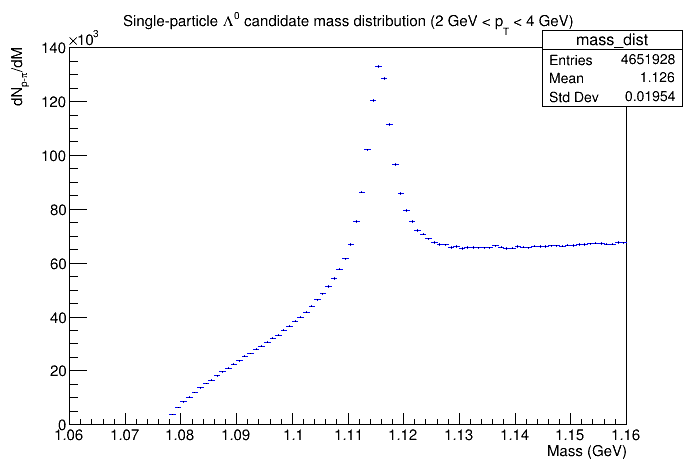

In [20]:
mass_dist.Draw()
c.Draw()

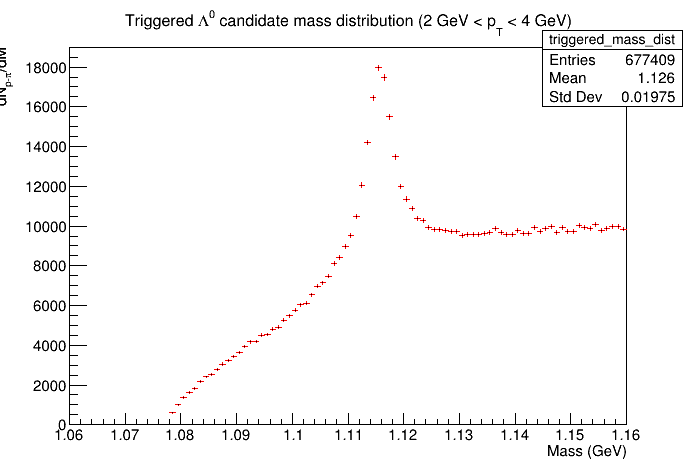

In [21]:
triggered_mass_dist.Draw()
c.Draw()

In [131]:
g_fit = rt.TF1("g_fit", "gaus(0) + pol4(3)", 1.11, 1.12)
full_g_fit = rt.TF1("g_fit", "gaus(0) + pol4(3)", 1.08, 1.16)
v_fit = rt.TF1("v_fit", "[0]*TMath::Voigt(x - [1], [2], [3], 4) + pol2(4)", 1.09, 1.15)

In [132]:
g_fit.SetNpx(1000)
g_fit.SetParameter(0, 60000)
g_fit.SetParameter(1, 1.115)
g_fit.SetParameter(2, 0.002)
g_fit.SetParameter(3, -90000)
g_fit.SetParameter(4, 10000)
g_fit.SetParameter(5, 100000)

In [133]:
mass_dist.Fit(g_fit, "RS")

 FCN=109.114 FROM HESSE     STATUS=NOT POSDEF     61 CALLS         423 TOTAL
                     EDM=1.0368e-07    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.96578e+04   3.23369e+02   1.89905e-01  -1.35782e-06
   2  p1           1.11562e+00   8.08174e-06   2.65985e-07   1.61178e+01
   3  p2           1.96726e-03   1.57417e-05   6.54105e-09  -3.30762e+01
   4  p3          -3.00589e+05   1.08826e+03   1.00419e-01  -2.20117e-06
   5  p4          -8.22634e+04   9.77756e+02   9.00912e-02  -2.71035e-06
   6  p5           1.04058e+05   8.78211e+02   8.08239e-02  -3.11515e-06
   7  p6           8.16348e+04   7.88312e+02   7.25085e-02  -3.36400e-06
   8  p7           1.43288e+05   7.07419e+02   6.50474e-02  -3.39222e-06


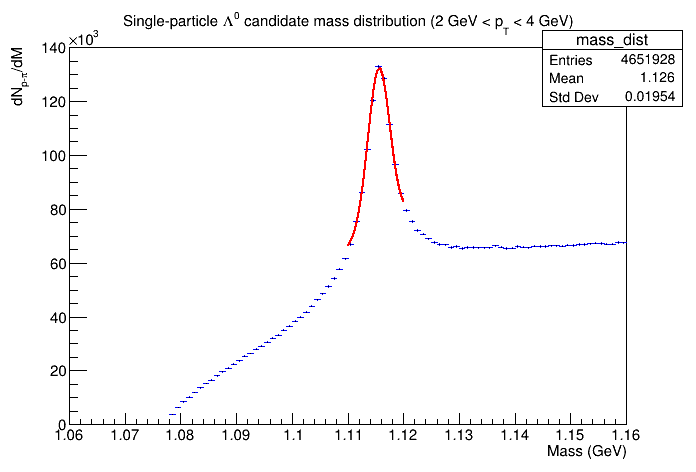

In [134]:
mass_dist.Draw()
g_fit.Draw("SAME")
c.Draw()

In [139]:
full_g_fit.SetParameter(0, g_fit.GetParameter(0))
full_g_fit.SetParameter(1, g_fit.GetParameter(1))
full_g_fit.SetParameter(2, g_fit.GetParameter(2))
full_g_fit.SetParameter(3, g_fit.GetParameter(3))
full_g_fit.SetParameter(4, g_fit.GetParameter(4))
full_g_fit.SetParameter(5, g_fit.GetParameter(5))
full_g_fit.SetParameter(6, g_fit.GetParameter(6))
full_g_fit.SetParameter(7, g_fit.GetParameter(7))

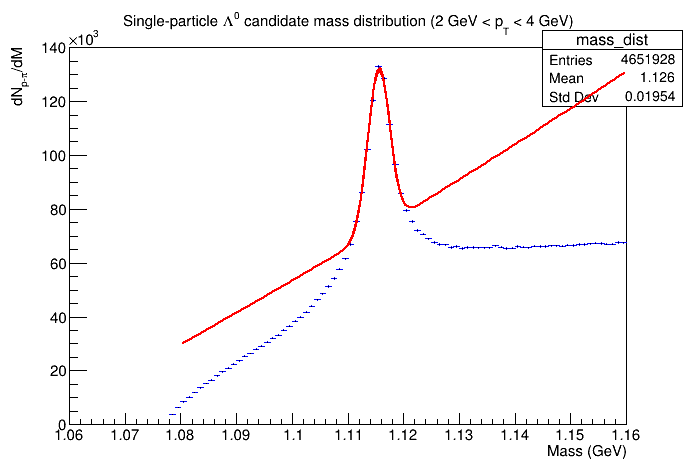

In [140]:
mass_dist.Draw()
full_g_fit.Draw("SAME")
c.Draw()